#### Exploratory Analysis of the Interactions

In [343]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as sp 
import pingouin as pg 

np.random.seed(42)
sns.set_style('ticks')
sns.set_palette('colorblind')

In [344]:
interaction_statistics = pd.read_csv('../data/statistics.csv')
interaction_statistics.head(2)

,user_id,part_one_time,part_two_time,overall_time,part_one_artwork_time_m,part_one_artwork_time_std,part_two_artwork_time_m,part_two_artwork_time_std,num_artworks_part_one,num_artworks_part_two,...,num_visited_before_first_choice_part_one,time_before_first_choice_part_one,num_visited_before_first_choice_part_two,time_before_first_selection_part_two,show_more_part_one,artwork_selected_part_one,artwork_deselected_part_one,show_more_part_two,artwork_selected_part_two,artwork_deselected_part_two
0,6737f57f-8646-4c03-9546-8da5a719d226,1.900,1.750,3.65,1.400,0.490,1.682,1.742,32,27,...,1,0.000,0,0.000,0,32,0,0,27,0
1,86b266c0-920c-4e83-802d-0083a06f3f1d,1.233,0.667,1.90,1.938,0.428,2.375,0.484,20,10,...,1,0.017,1,0.017,0,20,0,0,10,0


In [345]:
interaction_statistics.columns

Index(['user_id', 'part_one_time', 'part_two_time', 'overall_time',
       'part_one_artwork_time_m', 'part_one_artwork_time_std',
       'part_two_artwork_time_m', 'part_two_artwork_time_std',
       'num_artworks_part_one', 'num_artworks_part_two', 'total_events',
       'num_revisits_part_one', 'num_revisits_part_two',
       'num_visited_before_first_choice_part_one',
       'time_before_first_choice_part_one',
       'num_visited_before_first_choice_part_two',
       'time_before_first_selection_part_two', 'show_more_part_one',
       'artwork_selected_part_one', 'artwork_deselected_part_one',
       'show_more_part_two', 'artwork_selected_part_two',
       'artwork_deselected_part_two'],
      dtype='object')

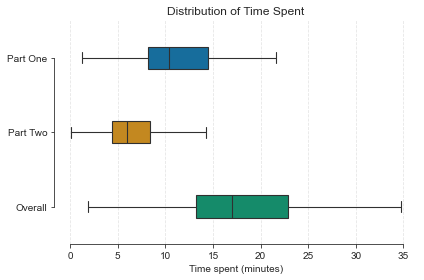

In [346]:
# time spent in the two parts - what is the distribution?
p = sns.boxplot(
    data = interaction_statistics[['part_one_time', 'part_two_time', 'overall_time']],
    orient = 'h',
    width = 0.3,
    linewidth = 1.1,
    notch = False, 
    showfliers = False,
)
p.set(
    xlabel = 'Time spent (minutes)',
    yticklabels = [
        'Part One', 'Part Two', 'Overall'
    ],
    # xticks = [0, 5, 10, 15, 20],
    title = 'Distribution of Time Spent'
)
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
p.set_axisbelow(True)
sns.despine(trim = True)
plt.tight_layout()
plt.show()

In [347]:
survey_responses = pd.read_csv('../data/user_condition_mapping.csv')
survey_responses.head(2)

,choice_satisfaction_one,choice_satisfaction_two,choice_satisfaction_three,choice_satisfaction_four,choice_satisfaction_five,choice_satisfaction_six,choice_satisfaction_seven,choice_satisfaction_eight,choice_satisfaction_nine,perceived_effectiveness_one,...,relevant_four,trust_one,trust_two,trust_three,trust_four,trust_five,condition,user_id,model_type,part
0,agree,neutral,neutral,agree,neutral,neutral,disagree,neutral,agree,agree,...,agree,disagree,neutral,strongly agree,disagree,agree,model,62b14681-8d4a-44b5-a201-942bba9b4bd8,image,part_one
1,neutral,disagree,neutral,disagree,neutral,disagree,disagree,strongly disagree,agree,agree,...,agree,disagree,neutral,strongly agree,disagree,agree,random,62b14681-8d4a-44b5-a201-942bba9b4bd8,random,part_two


In [348]:
id_model_mapping = survey_responses[survey_responses.model_type != 'random'][['user_id', 'model_type']].to_dict(orient = 'records')

import os, json  
if not os.path.isfile('../data/user_id_model_mapping.json'):
    with open('../data/user_id_model_mapping.json', 'w') as fp:
        json.dump(id_model_mapping, fp)

user_id_model_type_mapping = pd.DataFrame(id_model_mapping)
interaction_statistics = interaction_statistics.merge(
    right = user_id_model_type_mapping,
    on = 'user_id'
)
interaction_statistics.head(2)


,user_id,part_one_time,part_two_time,overall_time,part_one_artwork_time_m,part_one_artwork_time_std,part_two_artwork_time_m,part_two_artwork_time_std,num_artworks_part_one,num_artworks_part_two,...,time_before_first_choice_part_one,num_visited_before_first_choice_part_two,time_before_first_selection_part_two,show_more_part_one,artwork_selected_part_one,artwork_deselected_part_one,show_more_part_two,artwork_selected_part_two,artwork_deselected_part_two,model_type
0,62b14681-8d4a-44b5-a201-942bba9b4bd8,13.083,8.683,21.767,16.812,29.920,6.289,4.084,31,41,...,0.767,4,0.600,24,25,0,12,15,0,image
1,09cf0e31-cf99-47f3-906f-8da336f23f73,10.267,4.517,14.783,6.778,3.292,6.333,0.943,25,18,...,0.033,0,0.017,24,23,0,15,15,0,meta


In [349]:
interaction_statistics.columns


Index(['user_id', 'part_one_time', 'part_two_time', 'overall_time',
       'part_one_artwork_time_m', 'part_one_artwork_time_std',
       'part_two_artwork_time_m', 'part_two_artwork_time_std',
       'num_artworks_part_one', 'num_artworks_part_two', 'total_events',
       'num_revisits_part_one', 'num_revisits_part_two',
       'num_visited_before_first_choice_part_one',
       'time_before_first_choice_part_one',
       'num_visited_before_first_choice_part_two',
       'time_before_first_selection_part_two', 'show_more_part_one',
       'artwork_selected_part_one', 'artwork_deselected_part_one',
       'show_more_part_two', 'artwork_selected_part_two',
       'artwork_deselected_part_two', 'model_type'],
      dtype='object')

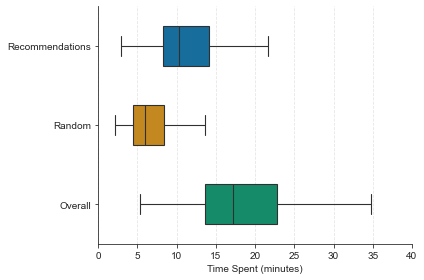

In [350]:
p = sns.boxplot(
    data = interaction_statistics[['part_one_time', 'part_two_time', 'overall_time']],
    orient = 'h',
    width = 0.5,
    linewidth = 1.1,
    notch = False,
    showfliers = False
)
p.set(
    xlabel = 'Time Spent (minutes)',
    ylabel = '',
    yticklabels = ['Recommendations', 'Random', 'Overall'],
    xticks = [0, 5, 10, 15, 20, 25, 30, 35, 40]
)
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
p.set_axisbelow(True)

sns.despine()
plt.tight_layout()
plt.show()

In [351]:
print(pg.normality(interaction_statistics['part_one_time']))
print()
print(pg.normality(interaction_statistics['part_two_time']))

                     W          pval  normal
part_one_time  0.82034  2.473868e-12   False

                      W          pval  normal
part_two_time  0.165496  1.377408e-25   False


In [352]:
pg.mwu(
    x = interaction_statistics['part_one_time'],
    y = interaction_statistics['part_two_time']
)

,U-val,alternative,p-val,RBC,CLES
MWU,18215.5,two-sided,2.681162e-19,-0.597781,0.79889


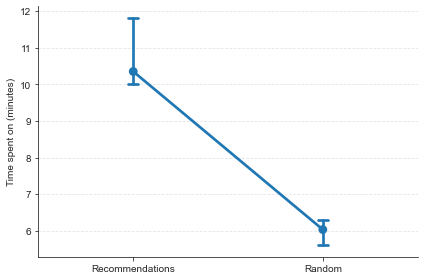

In [353]:
p = sns.pointplot(
    data = [
        interaction_statistics['part_one_time'], # time spent looking at recommendations
        interaction_statistics['part_two_time'] # time spent looking at random
    ],
    estimator = np.median, capsize = 0.05, color = 'tab:blue'
)
p.set(
    xticklabels = ['Recommendations', 'Random'],
    ylabel = 'Time spent on (minutes)'
)
p.yaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
sns.despine()
plt.tight_layout()
plt.show()

#### Distribution of time spent by the model used, in each part.

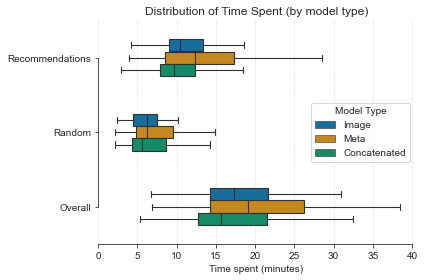

In [354]:
p = sns.boxplot(
    data = interaction_statistics.melt(
        id_vars = 'model_type',
        value_vars = ['part_one_time', 'part_two_time', 'overall_time'],
        value_name = 'time_value',
        var_name = 'time_feature'
    ),
    y = 'time_feature', x = 'time_value', hue = 'model_type',
    width = 0.5, 
    linewidth = 1.1,
    notch = False, 
    showfliers = False
)
p.set(
    xlabel = 'Time spent (minutes)',
    ylabel = '',
    yticklabels = ['Recommendations', 'Random', 'Overall'],
    title = 'Distribution of Time Spent (by model type)',
    xticks = [0, 5, 10, 15, 20, 25, 30, 35, 40]
)
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
p.set_axisbelow(True)


p.legend_.set_title('Model Type')
for t, l in zip(p.legend_.texts, ['Image', 'Meta', 'Concatenated']):
    t.set_text(l)

sns.despine(trim = True)
plt.tight_layout()
plt.show()

In [355]:
interaction_statistics.columns

Index(['user_id', 'part_one_time', 'part_two_time', 'overall_time',
       'part_one_artwork_time_m', 'part_one_artwork_time_std',
       'part_two_artwork_time_m', 'part_two_artwork_time_std',
       'num_artworks_part_one', 'num_artworks_part_two', 'total_events',
       'num_revisits_part_one', 'num_revisits_part_two',
       'num_visited_before_first_choice_part_one',
       'time_before_first_choice_part_one',
       'num_visited_before_first_choice_part_two',
       'time_before_first_selection_part_two', 'show_more_part_one',
       'artwork_selected_part_one', 'artwork_deselected_part_one',
       'show_more_part_two', 'artwork_selected_part_two',
       'artwork_deselected_part_two', 'model_type'],
      dtype='object')

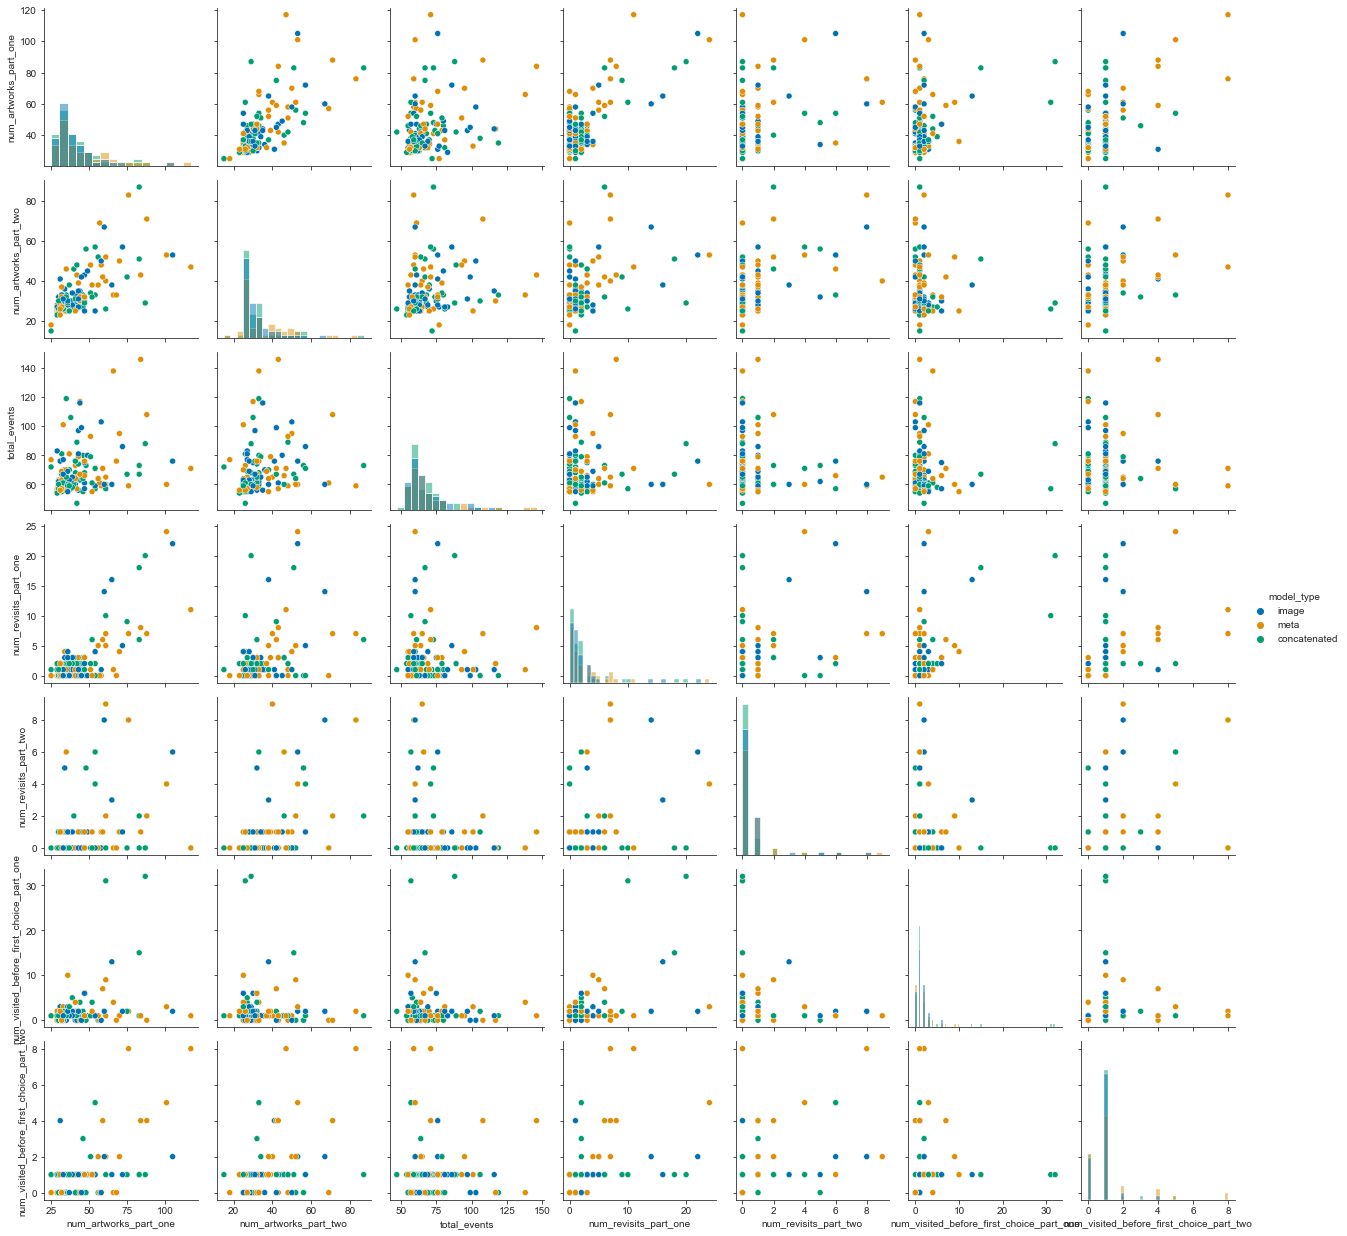

In [356]:
cols = [
    'num_artworks_part_one', 'num_artworks_part_two', 'total_events',
    'num_revisits_part_one', 'num_revisits_part_two',
    'num_visited_before_first_choice_part_one', 'num_visited_before_first_choice_part_two'
]
p = sns.PairGrid(interaction_statistics[cols + ['model_type']], hue = 'model_type')
p.map_diag(sns.histplot)
p.map_offdiag(sns.scatterplot)
p.add_legend()
plt.show()

##### Is there some difference between how long (number of artworks and time it takes) for someone to make a choice dependent on the part or the model type?

`num_visited_before_first_choice_part_one', 'num_visited_before_first_choice_part_two', 'time_before_first_choice_part_one', 'time_before_first_selection_part_two'`

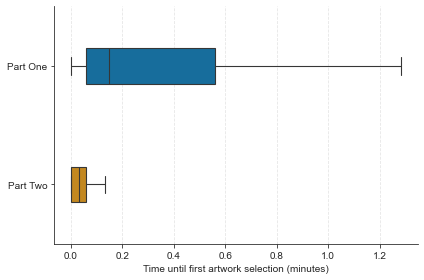

In [357]:
p = sns.boxplot(
    data = interaction_statistics[['time_before_first_choice_part_one', 'time_before_first_selection_part_two']],
    orient = 'h',
    width = 0.3,
    linewidth = 1.1,
    notch = False, 
    showfliers = False
)
p.set(
    xlabel = 'Time until first artwork selection (minutes)',
    yticklabels = ['Part One', 'Part Two']
)
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
p.set_axisbelow(True)
sns.despine()
plt.tight_layout()
plt.show()

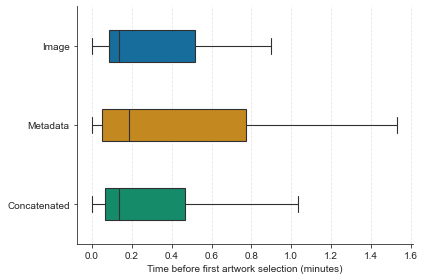

In [358]:
p = sns.boxplot(
    data = interaction_statistics,
    y = 'model_type', 
    x = 'time_before_first_choice_part_one',
    width = 0.4,
    linewidth = 1.1,
    notch = False,
    showfliers = False
)
p.set(
    xlabel = 'Time before first artwork selection (minutes)',
    ylabel = '',
    yticklabels = ['Image', 'Metadata', 'Concatenated']
)
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
p.set_axisbelow(True)

sns.despine()
plt.tight_layout()
plt.show()


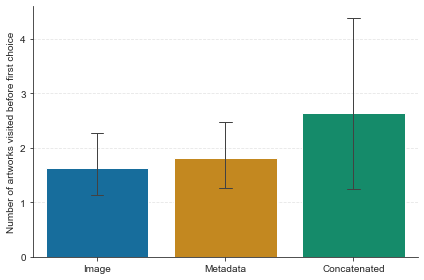

In [359]:
p = sns.barplot(
    y = 'num_visited_before_first_choice_part_one',
    x = 'model_type',
    data = interaction_statistics,
    capsize = 0.1,
    errwidth = 1
)
p.set(
    xlabel = '',
    ylabel = 'Number of artworks visited before first choice',
    xticklabels = ['Image', 'Metadata', 'Concatenated']
)
p.yaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
p.set_axisbelow(True)

sns.despine()
plt.tight_layout()
plt.show()

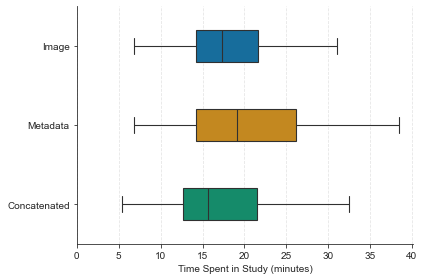

In [360]:
p = sns.boxplot(
    x = 'overall_time',
    y = 'model_type',
    data = interaction_statistics,
    width = 0.4,
    linewidth = 1.1,
    notch = False,
    showfliers = False
)
p.set(
    xlabel = 'Time Spent in Study (minutes)',
    ylabel = '',
    yticklabels = ['Image', 'Metadata', 'Concatenated'],
    xticks = [0, 5, 10, 15, 20, 25, 30, 35, 40]
)
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
p.set_axisbelow(True)

sns.despine()
plt.tight_layout()
plt.show()

#### Count-based statistics

In [361]:
interaction_statistics.columns

Index(['user_id', 'part_one_time', 'part_two_time', 'overall_time',
       'part_one_artwork_time_m', 'part_one_artwork_time_std',
       'part_two_artwork_time_m', 'part_two_artwork_time_std',
       'num_artworks_part_one', 'num_artworks_part_two', 'total_events',
       'num_revisits_part_one', 'num_revisits_part_two',
       'num_visited_before_first_choice_part_one',
       'time_before_first_choice_part_one',
       'num_visited_before_first_choice_part_two',
       'time_before_first_selection_part_two', 'show_more_part_one',
       'artwork_selected_part_one', 'artwork_deselected_part_one',
       'show_more_part_two', 'artwork_selected_part_two',
       'artwork_deselected_part_two', 'model_type'],
      dtype='object')

<AxesSubplot:xlabel='artwork_selected_part_one', ylabel='model_type'>

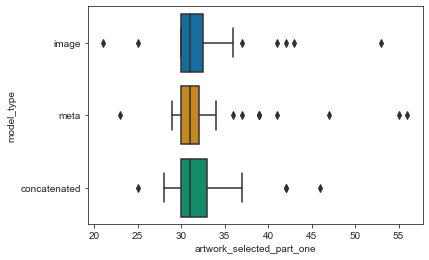

In [362]:
sns.boxplot(
    y = 'model_type', x = 'artwork_selected_part_one', 
    data = interaction_statistics
)

In [363]:
interaction_statistics.columns

Index(['user_id', 'part_one_time', 'part_two_time', 'overall_time',
       'part_one_artwork_time_m', 'part_one_artwork_time_std',
       'part_two_artwork_time_m', 'part_two_artwork_time_std',
       'num_artworks_part_one', 'num_artworks_part_two', 'total_events',
       'num_revisits_part_one', 'num_revisits_part_two',
       'num_visited_before_first_choice_part_one',
       'time_before_first_choice_part_one',
       'num_visited_before_first_choice_part_two',
       'time_before_first_selection_part_two', 'show_more_part_one',
       'artwork_selected_part_one', 'artwork_deselected_part_one',
       'show_more_part_two', 'artwork_selected_part_two',
       'artwork_deselected_part_two', 'model_type'],
      dtype='object')

##### Are there any predictive features in the data?

- Those that spent more time, did they record higher scores for in the survey (correlation)?
- Are the interaction metrics calculated from interacting with the models predictive of the scores (regression)?

In [364]:
users_and_scores = pd.read_csv('../data/merged_user_post_study.csv')
users_and_scores.head(5)

,choice_satisfaction_one,choice_satisfaction_two,choice_satisfaction_three,choice_satisfaction_four,choice_satisfaction_five,choice_satisfaction_six,choice_satisfaction_seven,choice_satisfaction_eight,choice_satisfaction_nine,perceived_effectiveness_one,...,museum_visits,view_collections,physical_visits,order,age,gender,education,work,disability,distraction_task_timestamp
0,agree,neutral,neutral,agree,neutral,neutral,disagree,neutral,agree,agree,...,once a year,first time,two or three years,model,30-39,male,masters,employed,not disabled,2022-07-22 14:02:10.897984
1,neutral,disagree,neutral,disagree,neutral,disagree,disagree,strongly disagree,agree,agree,...,once a year,first time,two or three years,model,30-39,male,masters,employed,not disabled,2022-07-22 14:02:10.897984
2,neutral,neutral,neutral,agree,strongly agree,agree,disagree,disagree,agree,neutral,...,once a year,once a year,two or three years,model,30-39,nonbinary,bachelors,employed,not disabled,2022-07-22 14:01:25.902276
3,neutral,neutral,neutral,strongly agree,strongly agree,agree,disagree,disagree,disagree,disagree,...,once a year,once a year,two or three years,model,30-39,nonbinary,bachelors,employed,not disabled,2022-07-22 14:01:25.902276
4,agree,agree,strongly agree,strongly agree,agree,neutral,disagree,agree,agree,agree,...,first time,once a year,once a year,model,21-29,male,masters,student,not disabled,2022-07-22 15:00:39.816547


In [365]:
## Those that spent more time, did they record higher scores in the survey?
columns = [
    'part_one_time', 'part_two_time', 'overall_time',
    'part_one_artwork_time_m', 'part_one_artwork_time_std',
    'part_two_artwork_time_m', 'part_two_artwork_time_std',
    'num_artworks_part_one', 'num_artworks_part_two', 'total_events',
    'num_revisits_part_one', 'num_revisits_part_two',
    'num_visited_before_first_choice_part_one',
    'time_before_first_choice_part_one',
    'num_visited_before_first_choice_part_two',
    'time_before_first_selection_part_two', 'show_more_part_one',
    'artwork_selected_part_one', 'artwork_deselected_part_one',
    'show_more_part_two', 'artwork_selected_part_two',
    'artwork_deselected_part_two'
]

test_data = interaction_statistics.merge(
    right = users_and_scores[users_and_scores.model_type != 'random'][[
        'user_id', 'satisfaction', 'effectiveness', 'quality', 'awareness'
    ]], 
    on = 'user_id'
)

test_data = pd.get_dummies(test_data, columns = ['model_type'])

# add the model type dummies into the columns
columns = columns + [x for x in test_data.columns if 'model_type' in x]

# pg.corr(test_data['part_one_time'], test_data['satisfaction'], method = 'spearman')
pg.pairwise_corr(
    data = test_data, 
    columns = [['part_one_time', 'part_two_time', 'overall_time'], ['satisfaction', 'effectiveness', 'quality', 'awareness']], 
    method = 'spearman',
    padjust = 'bonf'
)

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,part_one_time,satisfaction,spearman,two-sided,151,0.113793,"[-0.05, 0.27]",0.164160,1.0,bonf,0.286133
1,part_one_time,effectiveness,spearman,two-sided,151,0.070075,"[-0.09, 0.23]",0.392556,1.0,bonf,0.137188
2,part_one_time,quality,spearman,two-sided,151,-0.025960,"[-0.18, 0.13]",0.751694,1.0,bonf,0.061465
3,part_one_time,awareness,spearman,two-sided,151,-0.082004,"[-0.24, 0.08]",0.316827,1.0,bonf,0.170632
4,part_two_time,satisfaction,spearman,two-sided,151,0.020124,"[-0.14, 0.18]",0.806253,1.0,bonf,0.056828
5,part_two_time,effectiveness,spearman,two-sided,151,0.067232,"[-0.09, 0.22]",0.412089,1.0,bonf,0.130048
6,part_two_time,quality,spearman,two-sided,151,-0.121937,"[-0.28, 0.04]",0.135829,1.0,bonf,0.321211
7,part_two_time,awareness,spearman,two-sided,151,0.046771,"[-0.11, 0.2]",0.568496,1.0,bonf,0.087999
8,overall_time,satisfaction,spearman,two-sided,151,0.103995,"[-0.06, 0.26]",0.203823,1.0,bonf,0.246677
9,overall_time,effectiveness,spearman,two-sided,151,0.074799,"[-0.09, 0.23]",0.361356,1.0,bonf,0.149758


In [366]:
corr = pg.pairwise_corr(
    data = test_data, 
    columns = [columns, ['satisfaction', 'effectiveness', 'quality', 'awareness']],
    method = 'spearman',
    padjust = 'bonf'
)
corr[corr['r'] > 0.1]

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,part_one_time,satisfaction,spearman,two-sided,151,0.113793,"[-0.05, 0.27]",0.164160,1.0,bonf,0.286133
8,overall_time,satisfaction,spearman,two-sided,151,0.103995,"[-0.06, 0.26]",0.203823,1.0,bonf,0.246677
24,part_two_artwork_time_std,satisfaction,spearman,two-sided,148,0.158241,"[-0.0, 0.31]",0.054747,1.0,bonf,0.486973
26,part_two_artwork_time_std,quality,spearman,two-sided,148,0.113265,"[-0.05, 0.27]",0.170480,1.0,bonf,0.279204
85,artwork_deselected_part_two,effectiveness,spearman,two-sided,151,0.116138,"[-0.04, 0.27]",0.155585,1.0,bonf,0.296033
95,model_type_image,awareness,spearman,two-sided,151,0.113476,"[-0.05, 0.27]",0.165345,1.0,bonf,0.284809


In [367]:
# Are the interaction metrics predictive of the survey results?

# fill na with zero
test_data = test_data.fillna(0)

pg.linear_regression(
    X = test_data[columns], y = test_data['satisfaction'],
    add_intercept = True
).round(3)

/Users/user/miniconda3/envs/museum_rec_analytics/lib/python3.8/site-packages/pingouin/regression.py:420: UserWarning: Design matrix supplied with `X` parameter is rank deficient (rank 24 with 26 columns). That means that one or more of the columns in `X` are a linear combination of one of more of the other columns.
  warnings.warn(


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.397,0.265,9.061,0.000,0.158,0.005,1.873,2.920
1,part_one_time,-87.305,103.298,-0.845,0.400,0.158,0.005,-291.713,117.104
2,part_two_time,-87.355,103.295,-0.846,0.399,0.158,0.005,-291.757,117.047
3,overall_time,87.320,103.297,0.845,0.400,0.158,0.005,-117.087,291.726
4,part_one_artwork_time_m,-0.000,0.009,-0.023,0.982,0.158,0.005,-0.018,0.018
5,part_one_artwork_time_std,0.001,0.003,0.369,0.713,0.158,0.005,-0.005,0.007
6,part_two_artwork_time_m,0.002,0.028,0.076,0.939,0.158,0.005,-0.054,0.058
7,part_two_artwork_time_std,0.003,0.006,0.482,0.631,0.158,0.005,-0.009,0.014
8,num_artworks_part_one,0.001,0.008,0.070,0.944,0.158,0.005,-0.015,0.016
9,num_artworks_part_two,-0.010,0.009,-1.123,0.264,0.158,0.005,-0.027,0.008


In [368]:
pg.linear_regression(
    X = test_data[columns], y = test_data['effectiveness'],
    add_intercept = True
).round(3)

/Users/user/miniconda3/envs/museum_rec_analytics/lib/python3.8/site-packages/pingouin/regression.py:420: UserWarning: Design matrix supplied with `X` parameter is rank deficient (rank 24 with 26 columns). That means that one or more of the columns in `X` are a linear combination of one of more of the other columns.
  warnings.warn(


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.575,0.215,12.005,0.000,0.101,-0.061,2.151,3.000
1,part_one_time,-43.688,83.764,-0.522,0.603,0.101,-0.061,-209.442,122.066
2,part_two_time,-43.727,83.762,-0.522,0.603,0.101,-0.061,-209.476,122.022
3,overall_time,43.704,83.764,0.522,0.603,0.101,-0.061,-122.049,209.456
4,part_one_artwork_time_m,0.007,0.007,1.004,0.317,0.101,-0.061,-0.007,0.022
5,part_one_artwork_time_std,-0.002,0.003,-0.845,0.400,0.101,-0.061,-0.007,0.003
6,part_two_artwork_time_m,-0.006,0.023,-0.254,0.800,0.101,-0.061,-0.051,0.040
7,part_two_artwork_time_std,0.003,0.005,0.706,0.481,0.101,-0.061,-0.006,0.013
8,num_artworks_part_one,-0.002,0.006,-0.248,0.805,0.101,-0.061,-0.014,0.011
9,num_artworks_part_two,-0.006,0.007,-0.845,0.400,0.101,-0.061,-0.020,0.008


In [369]:
pg.linear_regression(
    X = test_data[columns], y = test_data['quality'],
    add_intercept = True
).round(3)

/Users/user/miniconda3/envs/museum_rec_analytics/lib/python3.8/site-packages/pingouin/regression.py:420: UserWarning: Design matrix supplied with `X` parameter is rank deficient (rank 24 with 26 columns). That means that one or more of the columns in `X` are a linear combination of one of more of the other columns.
  warnings.warn(


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.215,0.200,11.076,0.000,0.148,-0.006,1.819,2.611
1,part_one_time,67.503,78.098,0.864,0.389,0.148,-0.006,-87.039,222.044
2,part_two_time,67.435,78.095,0.863,0.389,0.148,-0.006,-87.102,221.972
3,overall_time,-67.477,78.097,-0.864,0.389,0.148,-0.006,-222.017,87.063
4,part_one_artwork_time_m,0.002,0.007,0.342,0.733,0.148,-0.006,-0.011,0.016
5,part_one_artwork_time_std,-0.002,0.002,-0.737,0.462,0.148,-0.006,-0.007,0.003
6,part_two_artwork_time_m,-0.003,0.021,-0.137,0.892,0.148,-0.006,-0.045,0.040
7,part_two_artwork_time_std,0.004,0.004,0.925,0.357,0.148,-0.006,-0.005,0.013
8,num_artworks_part_one,-0.011,0.006,-1.877,0.063,0.148,-0.006,-0.023,0.001
9,num_artworks_part_two,-0.004,0.007,-0.661,0.510,0.148,-0.006,-0.018,0.009


In [370]:
pg.linear_regression(
    X = test_data[columns], y = test_data['awareness'],
    add_intercept = True
).round(3)

/Users/user/miniconda3/envs/museum_rec_analytics/lib/python3.8/site-packages/pingouin/regression.py:420: UserWarning: Design matrix supplied with `X` parameter is rank deficient (rank 24 with 26 columns). That means that one or more of the columns in `X` are a linear combination of one of more of the other columns.
  warnings.warn(


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.476,0.456,5.425,0.000,0.093,-0.071,1.573,3.379
1,part_one_time,81.534,178.211,0.458,0.648,0.093,-0.071,-271.113,434.182
2,part_two_time,81.600,178.206,0.458,0.648,0.093,-0.071,-271.037,434.236
3,overall_time,-81.551,178.210,-0.458,0.648,0.093,-0.071,-434.196,271.094
4,part_one_artwork_time_m,0.000,0.016,0.015,0.988,0.093,-0.071,-0.031,0.032
5,part_one_artwork_time_std,-0.001,0.005,-0.176,0.860,0.093,-0.071,-0.012,0.010
6,part_two_artwork_time_m,-0.042,0.049,-0.860,0.392,0.093,-0.071,-0.139,0.055
7,part_two_artwork_time_std,0.005,0.010,0.526,0.600,0.093,-0.071,-0.015,0.025
8,num_artworks_part_one,-0.003,0.014,-0.244,0.808,0.093,-0.071,-0.030,0.024
9,num_artworks_part_two,-0.022,0.015,-1.412,0.160,0.093,-0.071,-0.052,0.009
